In [74]:
import pytest
import numpy as np
import trackpy as tp
import random
import pandas as pd
import skimage.measure
import matplotlib.pyplot as plt

In [105]:
def test_make_organoid_masks(x,y,r,L):

    X,Y = np.ogrid[:L, :L]

    assert isinstance(x, list)
    assert isinstance(y, list)
    assert len(x) == len(y)

    test_image = np.zeros((L, L))

    for xn, yn, n in zip(x,y,range(len(x))):

        distance = np.sqrt((X-xn)**2 + (Y-yn)**2)
        test_image[distance<r] = n

    return test_image.astype(int)

def test_image():

    # number of organoids
    n = random.sample([1,2,3,4], 1)[0]
    L = 30

    # organoid positions
    r = 5
    x = random.sample(range(0, L), n)
    y = random.sample(range(0, L), n)
    
    test_image = test_make_organoid_masks(x,y,r,L)

    return test_image.astype(int)

def test_image_sequence():
    
    n = random.sample([10,11,12,13], 1)[0]
    
    return [test_image() for  i in range(n)]

In [106]:
image = test_image()

In [107]:
def get_mask_properties(label_image,
                       properties = ('centroid','perimeter','area')):

    mask_properties = skimage.measure.regionprops_table(label_image, 
                                          properties=properties)
    
    mask_properties = pd.DataFrame(mask_properties).rename({'centroid-0': 'x', 'centroid-1': 'y'}, axis='columns')
    
    return mask_properties

check that the test images are correct:

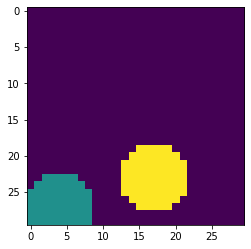

In [108]:
plt.imshow(image)

we verify that the information we get is relevant:

In [109]:
get_mask_properties(image)

,x,y,perimeter,area
0,26.280702,4.0,25.656854,57
1,23.000000,17.0,27.313708,69


## analyzing an image sequence

we get the organoid properties sequentially and then link the individual organoids together using trackpy.

In [110]:
test_image_sequence = test_image_sequence()

In [111]:
organoid_data = pd.DataFrame()

for image, frame in zip(image_sequence, range(len(image_sequence))):
    
    properties = get_mask_properties(image)
    properties['frame'] = frame
    
    organoid_data = organoid_data.append(properties)

In [114]:
organoid_data = tp.link(organoid_data, 15, memory=3)

Frame 12: 1 trajectories present.


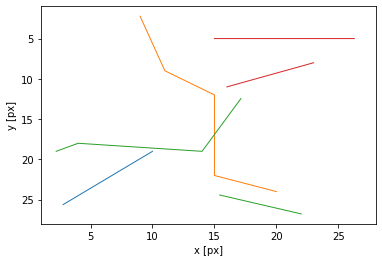

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [115]:
plt.figure()
tp.plot_traj(organoid_data)